A quick look at known lensed QSOs

# Castles webpage

https://www.cfa.harvard.edu/castles/

In [1]:
pwd

'/Users/abombrun/IPythonNB/Projects/Preparation4Stat'

In [2]:
%matplotlib inline
from astropy.table import Table
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates.sky_coordinate import SkyCoord
import astropy.units as u
import matplotlib as mp

In [3]:
mp.rcParams['figure.figsize'] = (12, 8)

In [4]:
Lqso = pd.read_csv("data/lensedQSO.csv",sep='\t',skipinitialspace=True)

In [5]:
Lqso.columns

Index(['#', 'Image', 'Lens Name', 'G', 'zs', 'zl', 'RA (J2000)', 'Dec (J2000)',
       'E(B-V)', 'ms (mag)', 'ml (mag)', 'FGHz (mJy)', 'Nim', 'size (")',
       'dt (days)', 'sigma (km/s)'],
      dtype='object')

In [6]:
Lqso.columns = ['#', 'Image', 'name', 'G', 'zs', 'zl', 'Ra', 'Dec',
       'Ext', 'ms', 'ml', 'FGHz', 'Nim', 'dl',
       'dt', 'sigma']

number of confirmed lensed

In [7]:
Lqso[Lqso.G=='A'][:10]

,#,Image,name,G,zs,zl,Ra,Dec,Ext,ms,ml,FGHz,Nim,dl,dt,sigma
0,1,NaN,Q0047-2808,A,3.60,0.48,00:49:41.89,-27:52:25.7,0.016,NaN,I=20.05,NaN,4ER,2.70,NaN,229±15
1,2,NaN,HE0047-1756,A,1.66,0.41,00:50:27.83,-17:40:8.8,0.022,I=16.53/2,I=18.97,NaN,2,1.44,NaN,NaN
5,6,NaN,PMNJ0134-0931,A,2.216,0.77,01:34:35.67,-09:31:02.9,0.031,I=18.96/4,I=19.31,F5=529,5R,0.73,NaN,NaN
6,7,NaN,Q0142-100,A,2.72,0.49,01:45:16.5,-09:45:17,0.031,I=16.47/2,I=18.72,F5~1,2,2.24,NaN,NaN
7,8,NaN,QJ0158-4325,A,1.29,0.317,01:58:41.44,-43:25:04.20,0.015,I=17.39/2,I=18.91,F8<0.2,2,1.22,NaN,NaN
8,9,NaN,B0218+357,A,0.96,0.68,02:21:05.483,+35:56:13.78,0.068,I=19.28/2,I=20.06,F5=1209,2ER,0.34,10.5±0.4,NaN
9,10,NaN,HE0230-2130,A,2.162,0.52,02:32:33.1,-21:17:26,0.022,I=18.00/4,I=20.39,NaN,4,2.05,NaN,NaN
10,11,NaN,SDSS0246-0825,A,1.68,NaN,02:46:34.11,-08:25:36.2,0.026,I=16.98/2,I=20.82,NaN,2,1.19,NaN,NaN
12,13,NaN,J0332-2756,A,NaN,0.617,03:32:38.22,-27:56:52.9,0.008,V=-1.95/6,V=20.74,NaN,2E,3.64,NaN,NaN
13,14,NaN,MG0414+0534,A,2.64,0.96,04:14:37.73,+05:34:44.3,0.303,I=19.62/4,I=20.91,F5=977,4E,2.40,NaN,NaN


In [8]:
Lqso.Ra = Lqso.Ra.apply(str)
Lqso.Dec = Lqso.Dec.apply(str)
Lqso['ra_deg'] = SkyCoord(Lqso.Ra.values,Lqso.Dec.values,unit=(u.hourangle, u.deg)).ra.deg
Lqso['dec_deg'] = SkyCoord(Lqso.Ra.values,Lqso.Dec.values,unit=(u.hourangle, u.deg)).dec.deg
Lqso['ra'] = SkyCoord(Lqso.Ra.values,Lqso.Dec.values,unit=(u.hourangle, u.deg)).ra.rad
Lqso['dec'] = SkyCoord(Lqso.Ra.values,Lqso.Dec.values,unit=(u.hourangle, u.deg)).dec.rad

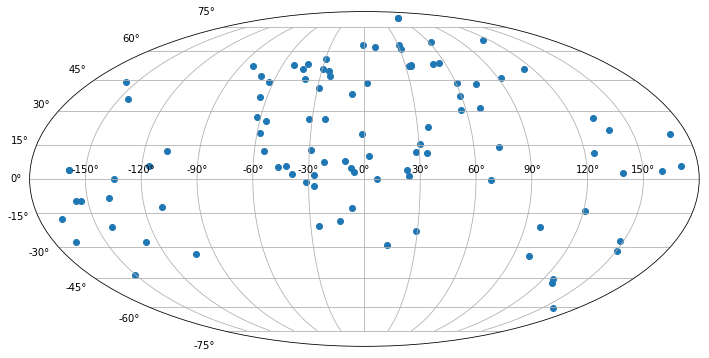

In [10]:
plt.subplot(111,projection="mollweide")
plt.scatter(Lqso.ra-np.pi,Lqso.dec)
plt.grid()

In [11]:
Lqso[Lqso.dl>5]

,#,Image,name,G,zs,zl,Ra,Dec,Ext,ms,ml,FGHz,Nim,dl,dt,sigma,ra_deg,dec_deg,ra,dec
30,31,NaN,RXJ0921+4529,B,1.65,0.31,09:21:12.81,+45:29:04.4,0.018,I=17.74/3,I=20.24,NaN,2,6.97,NaN,NaN,140.303375,45.484556,2.448756,0.793855
34,35,NaN,Q0957+561,A,1.41,0.36,10:01:20.78,+55:53:49.4,0.009,I=15.99/2,I=17.12,F5=65.6,2E,6.26,417.0±3.0,288±9,150.336583,55.897056,2.623868,0.975588
37,38,NaN,SDSS1004+4112,A,1.734,0.68,10:04:34.91,+41:12:42.8,0.013,i=17.53/4,i=18.42,NaN,4,15.99,821.6±2.1,NaN,151.145458,41.211889,2.637986,0.719283
43,44,NaN,SDSS1029+2623,A,2.197,0.55,10:29:13.35,+26:23:31.8,0.022,NaN,NaN,NaN,4,22.50,746.±10.,NaN,157.305625,26.392167,2.745501,0.460630


Text(0.5,0,"lens size ['']")

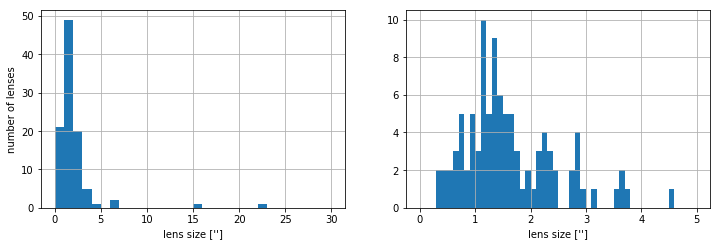

In [12]:
plt.subplot(221)
Lqso.dl.hist(bins=30,range=(0,30))
plt.xlabel("lens size ['']")
plt.ylabel("number of lenses")

plt.subplot(222)
Lqso.dl.hist(bins=50,range=(0,5))
plt.xlabel("lens size ['']")

In [13]:
from pyparsing import nestedExpr

In [14]:
def parseZ(s):
    """ parse crazy values"""
    ss = str(s)
    try :
        if '(' in ss :
            res = nestedExpr('(',')').parseString(ss).asList()
            return np.double(res[0][0])
        return np.double(ss)
    except :
        return np.nan

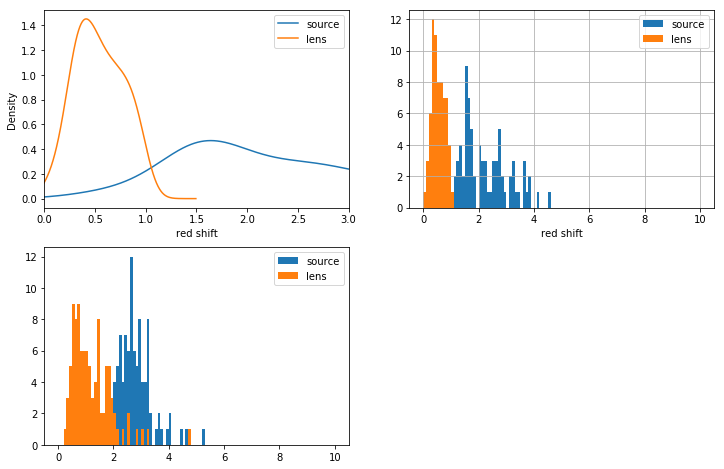

In [19]:
plt.subplot(221)
Lqso.zs.apply(parseZ).plot.kde(label="source")
Lqso.zl.apply(parseZ).plot.kde(label="lens")
plt.xlabel("red shift")
plt.legend()
plt.xlim(0,3)

plt.subplot(222)
Lqso.zs.apply(parseZ).hist(bins=100,label="source",range=(0,10))
Lqso.zl.apply(parseZ).hist(bins=100,label="lens",range=(0,10))
plt.xlabel("red shift")
plt.legend()

plt.subplot(223)
zl = np.random.lognormal(0,0.5,100)
zs = np.random.lognormal(1,0.2,100)
plt.hist(zs,bins=100,label="source",range=(0,10));
plt.hist(zl,bins=100,label="lens",range=(0,10));
plt.legend()

In [19]:
Lqso.to_csv("Lqso.csv")

# Simbad

In [21]:
from astroquery.simbad import Simbad

In [22]:
mySimbad = Simbad()

mySimbad.list_votable_fields()

In [23]:
mySimbad.add_votable_fields('z_value','flux(I)','flux(V)')

In [24]:
mySimbad.get_votable_fields()

['main_id', 'coordinates', 'z_value', 'flux(I)', 'flux(V)']

In [42]:
LQSO = mySimbad.query_criteria(otype='LeQ')

In [43]:
LQSO[:10]

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,Z_VALUE,FLUX_I,FLUX_V
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,,mag,mag
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,float64,float32,float32
[KIO2010] SDSS J1055+4628 B,10 55 45.45,+46 28 40.5,6,6,--,--,0,D,,2010AJ....139.1614K,--,20.17,21.07
[PBW92] 1422+231 B,14 24 38.09,+22 56 00.6,6,6,--,--,0,D,,2014MNRAS.440..870T,3.6200000,--,--
[MOK2016] SDSS J1254+1857 B,12 54 40.295,+18 57 11.44,7,7,--,--,0,C,O,2016MNRAS.456.1595M,1.7170000,--,--
[WCL99] HE 0230-2130 A1,02 32 33.10,-21 17 26.0,6,6,--,--,0,D,,1999A&A...348L..41W,--,--,--
[OIB2008] SDSS J1330+1810 C,13 30 18.59,+18 10 33.4,6,6,--,--,0,D,O,2008MNRAS.391.1973O,--,--,19.89
[VV2006] J074352.7+245743,07 43 52.6151,+24 57 43.696,8,8,99.000,75.000,0,B,,2009A&A...505..385A,2.1652000,18.9,19.33
[MOK2016] SDSS J0256+0153 B,02 56 40.653,+01 53 30.06,7,7,--,--,0,C,O,2016MNRAS.456.1595M,2.6000000,20.79,22.33
QSO J1417+5226,14 17 35.9,+52 26 46,5,5,--,--,0,D,O,2010A&A...518A..10V,3.4000000,--,--


In [56]:
from astropy.coordinates import Angle

In [57]:
Angle('1:2:30.43 degrees')

<Angle 1.04178611 deg>

In [50]:
LQSO = LQSO.to_pandas()

some RA are empty...

In [72]:
LQSO[LQSO.RA.isin(['',' '])]

,MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,Z_VALUE,FLUX_I,FLUX_V
166,b'[MBS92] 1208+101 B',,,0.0,0.0,NaN,NaN,0.0,,,b'',NaN,NaN,NaN
169,b'[SRS93] 1009-0252 A',,,0.0,0.0,NaN,NaN,0.0,,,b'',NaN,NaN,NaN


In [75]:
LQSO=LQSO[~LQSO.RA.isin(['',' '])]

In [79]:
def setRaDec(Lqso):
    Lqso['Ra'] = Lqso.RA.apply(str) + " hours"
    Lqso['Dec'] = Lqso.DEC.apply(str) + " degrees"
    Lqso['ra_deg'] = SkyCoord(Lqso.Ra.values,Lqso.Dec.values).ra.deg
    Lqso['dec_deg'] = SkyCoord(Lqso.Ra.values,Lqso.Dec.values).dec.deg
    Lqso['ra'] = SkyCoord(Lqso.Ra.values,Lqso.Dec.values).ra.rad
    Lqso['dec'] = SkyCoord(Lqso.Ra.values,Lqso.Dec.values).dec.rad

In [80]:
setRaDec(LQSO)

In [81]:
LQSO[:10]

,MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,Z_VALUE,FLUX_I,FLUX_V,Ra,Dec,ra_deg,dec_deg,ra,dec
0,b'[KIO2010] SDSS J1055+4628 B',10 55 45.45,+46 28 40.5,6.0,6.0,NaN,NaN,0.0,D,,b'2010AJ....139.1614K',NaN,20.170000,21.070000,10 55 45.45 hours,+46 28 40.5 degrees,163.939375,46.477917,2.861282,0.811193
1,b'[PBW92] 1422+231 B',14 24 38.09,+22 56 00.6,6.0,6.0,NaN,NaN,0.0,D,,b'2014MNRAS.440..870T',3.62000,NaN,NaN,14 24 38.09 hours,+22 56 00.6 degrees,216.158708,22.933500,3.772681,0.400265
2,b'[MOK2016] SDSS J1254+1857 B',12 54 40.295,+18 57 11.44,7.0,7.0,NaN,NaN,0.0,C,O,b'2016MNRAS.456.1595M',1.71700,NaN,NaN,12 54 40.295 hours,+18 57 11.44 degrees,193.667896,18.953178,3.380142,0.330795
3,b'[WCL99] HE 0230-2130 A1',02 32 33.10,-21 17 26.0,6.0,6.0,NaN,NaN,0.0,D,,b'1999A&A...348L..41W',NaN,NaN,NaN,02 32 33.10 hours,-21 17 26.0 degrees,38.137917,-21.290556,0.665632,-0.371590
4,b'[OIB2008] SDSS J1330+1810 C',13 30 18.59,+18 10 33.4,6.0,6.0,NaN,NaN,0.0,D,O,b'2008MNRAS.391.1973O',NaN,NaN,19.889999,13 30 18.59 hours,+18 10 33.4 degrees,202.577458,18.175944,3.535644,0.317230
5,b'[VV2006] J074352.7+245743',07 43 52.6151,+24 57 43.696,8.0,8.0,99.000000,75.000000,0.0,B,,b'2009A&A...505..385A',2.16520,18.900000,19.330000,07 43 52.6151 hours,+24 57 43.696 degrees,115.969230,24.962138,2.024045,0.435671
6,b'[MOK2016] SDSS J0256+0153 B',02 56 40.653,+01 53 30.06,7.0,7.0,NaN,NaN,0.0,C,O,b'2016MNRAS.456.1595M',2.60000,20.790001,22.330000,02 56 40.653 hours,+01 53 30.06 degrees,44.169387,1.891683,0.770901,0.033016
7,b'QSO J1417+5226',14 17 35.9,+52 26 46,5.0,5.0,NaN,NaN,0.0,D,O,b'2010A&A...518A..10V',3.40000,NaN,NaN,14 17 35.9 hours,+52 26 46 degrees,214.399583,52.446111,3.741979,0.915357
8,b'[DGS2013] SDSS J2222+2745',22 22 08.0,+27 45 34,5.0,5.0,NaN,NaN,0.0,E,,b'2013ApJ...773..146D',2.82000,NaN,NaN,22 22 08.0 hours,+27 45 34 degrees,335.533333,27.759444,5.856161,0.484494
9,b'QSO B1001+4127',10 04 34.9208,+41 12 42.523,8.0,8.0,174.100006,160.300003,90.0,C,,b'2009A&A...505..385A',1.73988,NaN,19.030001,10 04 34.9208 hours,+41 12 42.523 degrees,151.145503,41.211812,2.637987,0.719282


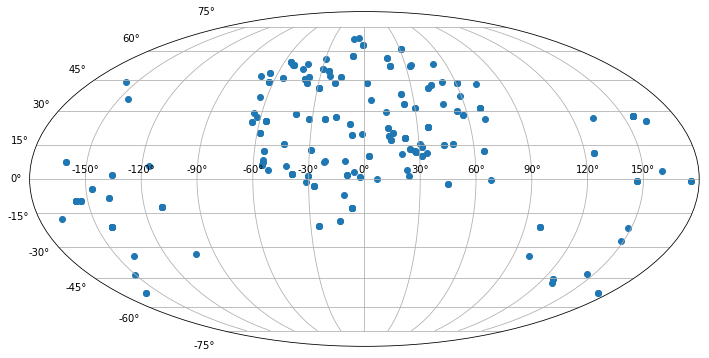

In [83]:
plt.subplot(111,projection="mollweide")
plt.scatter(LQSO.ra-np.pi,LQSO.dec)
plt.grid()

In [27]:
mySimbad.ROW_LIMIT = 10000

In [28]:
CLQSO = mySimbad.query_criteria(otype='Le?')

In [29]:
CLQSO

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,Z_VALUE,FLUX_I,FLUX_V
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,,mag,mag
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,float64,float32,float32
SDSS J152747.69+031432.1,15 27 47.690,+03 14 32.11,7,7,48.000,41.000,90,C,O,2009yCat.2294....0A,0.2223300,--,--
[RGO99] HST J16302+8230,16 30 12.9,+82 29 59,5,5,--,--,0,D,,1999AJ....117.2010R,--,--,--
[HGO2008] SDSS J1040+3405,10 40 19.72,+34 05 19.8,6,6,--,--,0,D,,2008AJ....135..664H,0.4450000,--,--
SOGRAS J0850+0015,08 50 23.0,+00 15 36,5,5,--,--,0,D,O,2013MNRAS.432...73F,0.2020000,--,--
SDSS J145237.94+091835.3,14 52 37.949,+09 18 35.36,7,7,22.000,14.000,90,C,O,2012ApJS..203...21A,0.0547300,--,--
SDSS J232943.08+152219.9,23 29 43.086,+15 22 19.87,7,7,13.000,11.000,90,C,O,2012ApJS..203...21A,0.1028100,--,--
[LKS2009]SDSS J2124-0047,21 24 29.83,-00 47 27.1,6,6,--,--,0,D,,2009ApJ...698..428L,--,--,--
[GMB2011] 2864,01 37 29.0,-00 09 56,5,5,--,--,0,D,O,2013MNRAS.432...73F,0.3360000,--,--
